In [4]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/heartdisease_data.csv", 
                 na_values={'63':["?"," "], '1':["?"," "], '4':["?"," "], '140':["?"," "], '260':["?"," "], 
                            '0':["?"," "], '1.1':["?"," "], '112':["?"," "], '1.2':["?"," "], '3':["?"," "],
                            '2':["?"," "], '?':["?"," "], '?.1':["?"," "], '2.1':["?"," "]})

In [5]:
data.head()

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0


In [6]:
data.rename(columns={"63":"age", "1":"sex","4":"cp","140":"trestbps","260":"chol", "0":"fbs","1.1":"restecg","112":"thalach",
                     "1.2":"exang","3":"oldpeak","2":"slope","?":"ca","?.1":"thal","2.1":"goal"}, inplace=True)

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0


In [8]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          197
thal        165
goal          0
dtype: int64

In [9]:
data.drop(columns=["ca", "thal"], inplace=True)

In [10]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'goal'],
      dtype='object')

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


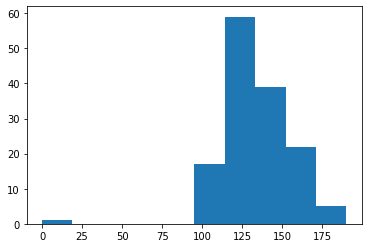

In [11]:
plt.hist(x=data.trestbps)
plt.show()

In [12]:
#as  trestbps (resting blood pressure (in mm Hg on admission to the hospital))is leftside skewed distributed, we will take "median" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
data["trestbps"]=si.fit_transform(data["trestbps"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


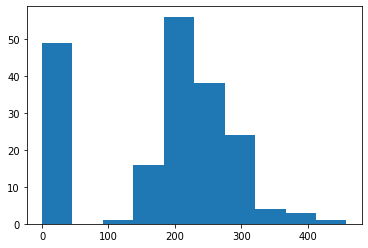

In [13]:
plt.hist(x=data.chol)
plt.show()

In [14]:
#as  trestbps (resting blood pressure (in mm Hg on admission to the hospital))is leftside skewed distributed, we will take "median" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
data["chol"]=si.fit_transform(data["chol"].values.reshape(-1,1))

/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


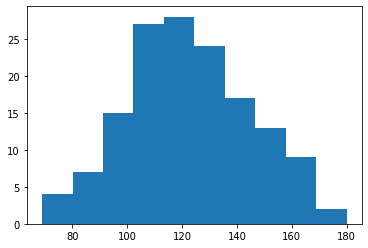

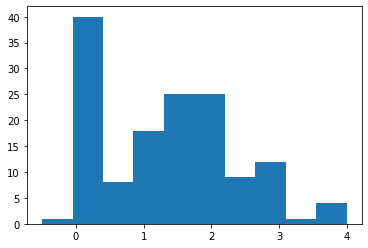

In [15]:
plt.hist(x=data.thalach)
plt.show()

plt.hist(x=data.oldpeak)
plt.show()

In [16]:
#as  thalach (maximum heart rate achieved)is symmetrically distributed, we will take "mean" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="mean")
data["thalach"]=si.fit_transform(data["thalach"].values.reshape(-1,1))

#as  oldpeak (ST depression induced by exercise relative to rest)is leftside skewed distributed, we will take "median" to fill na values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
data["oldpeak"]=si.fit_transform(data["oldpeak"].values.reshape(-1,1))

In [17]:
data.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           7
restecg       0
thalach       0
exang        53
oldpeak       0
slope       102
goal          0
dtype: int64

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
goal        0
dtype: int64

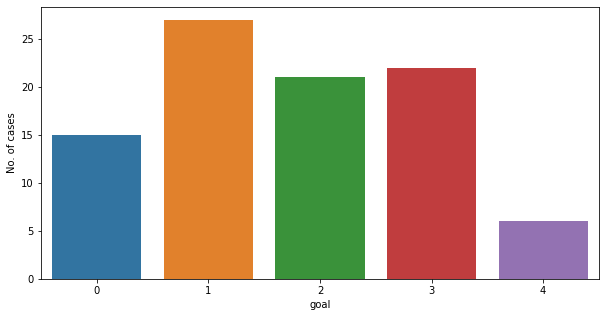

In [20]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(data["goal"])
plt.xlabel("goal")
plt.ylabel("No. of cases")
plt.show()

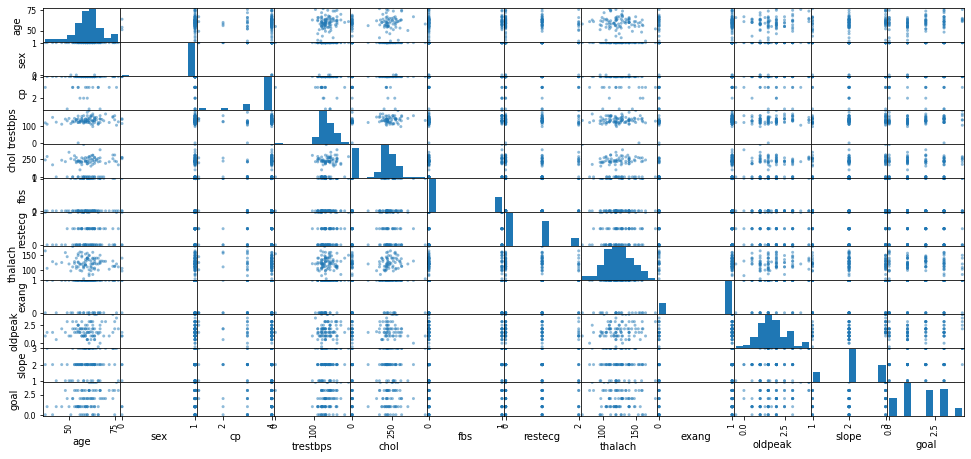

In [21]:
scatter_matrix(data, figsize=(16.5,7.5))
plt.show()

In [22]:
corrmat=data.corr()

<AxesSubplot:>

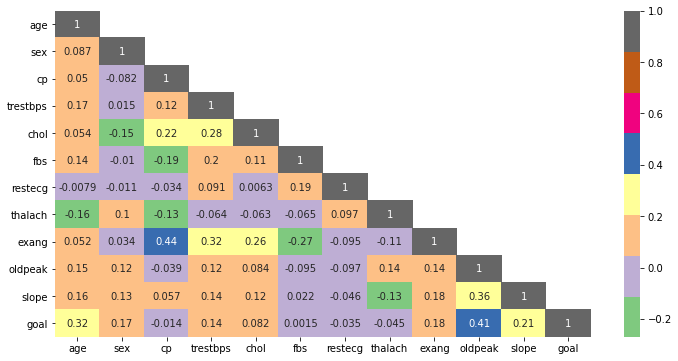

In [23]:
plt.figure(figsize=(12,6))
m=np.ones_like(corrmat)
m[np.tril_indices_from(m)]=0
sns.heatmap(corrmat, annot=True, cmap="Accent", mask=m)

In [24]:
#to handle the outliers
from scipy.stats import zscore
z=abs(zscore(data))
data_mod=data[(z<3).all(axis=1)]

In [25]:
data.shape, data_mod.shape

((91, 12), (83, 12))

In [26]:
X=data_mod.drop(columns="goal")
y=data_mod.goal

In [27]:
#to handle the skewness
X.skew()
import numpy as np
for col in X.columns:
    if X[col].skew()>.55:
        X[col]=np.log1p(X[col])

In [28]:
X.skew()

age        -0.269115
sex         0.000000
cp         -2.398992
trestbps    0.263742
chol       -0.408483
fbs         0.882655
restecg     0.270931
thalach     0.019091
exang      -1.489912
oldpeak     0.344471
slope      -0.169114
dtype: float64

In [29]:
#to handle multi collinearity of predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor as vifs
vif=pd.DataFrame()
vif["Features"]=X.columns
vif["VIF"]=[vifs(X.values,i) for i in range(X.shape[1])]
vif

,Features,VIF
0,age,1.110040
1,sex,1803.801655
2,cp,1.187947
3,trestbps,1.255476
4,chol,1.216618
5,fbs,1.284995
6,restecg,1.097781
7,thalach,1.171765
8,exang,1.366874
9,oldpeak,1.323172


In [30]:
new_data=data.drop (columns=["sex"])
new_data.columns

Index(['age', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'goal'],
      dtype='object')

In [31]:
#performing standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_=sc.fit_transform(X)
X_mod=pd.DataFrame(X_, columns=X.columns)

In [32]:
from sklearn.model_selection import train_test_split as split
X_train, X_test, y_train, y_test=split(X_mod,y, random_state=123, test_size=.2)

In [33]:
from sklearn.model_selection import train_test_split as split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
model=[LogisticRegression(),SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
for m in model:
    m.fit(X_train, y_train)
    m.score(X_train, y_train)
    y_pred=m.predict(X_test)
    print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("*********************************************")
    print()
    print() 

for model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) acc_score: 0.35294117647058826
mse: 1.0588235294117647
rmse: 1.3719886811400708
*********************************************


for model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) acc_score: 0.29411764705882354
mse: 1.1176470588235294
rmse: 1.4348601079588785
*********************************************


for model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, ma

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
y_pred=knn.predict(X_test)
print("for model:", m,"acc_score:", accuracy_score(y_test, y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

for model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) acc_score: 0.23529411764705882
mse: 1.2941176470588236
rmse: 1.6087993330796875


In [35]:
#Ensemble technique to improve the accuracy
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
rf=RandomForestClassifier(n_estimators=500, random_state=123)
gdb=GradientBoostingClassifier()
adb=AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=500, random_state=123)
en=[rf, gdb,adb]
for i in en:
    i.fit(X_train, y_train)
    i.score(X_train, y_train)
    y_pred=i.predict(X_test)
    print("for Ensemble Tech", i, "Accuracy Score:", accuracy_score(y_test,y_pred))
    print("mse:",mean_absolute_error(y_test, y_pred))
    print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print()
    print()

for Ensemble Tech RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False) Accuracy Score: 0.4117647058823529
mse: 1.0588235294117647
rmse: 1.4552137502179978


for Ensemble Tech GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_

In [36]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestClassifier()
parameters={"random_state" : range(42,200)}
clf=GridSearchCV(rf, parameters)
clf.fit(X_train,y_train)
clf.best_params_

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


{'random_state': 159}

In [37]:
rf=RandomForestClassifier(random_state=159)
rf.fit(X_train, y_train)
y_pred=rfr.predict (X_test)
print("acc_score:", accuracy_score(y_test, y_pred))
print("mse:",mean_absolute_error(y_test, y_pred))
print("rmse:", np.sqrt(mean_squared_error(y_test, y_pred)))

NameError: name 'rfr' is not defined